## 1.<font color = '#C0392B'> Import Madules </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from platform import python_version
%matplotlib widget

In [2]:
print('Python: {}'.format(python_version()))
print('Numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.9.7
Numpy: 1.19.5
matplotlib: 3.4.3


## 2.<font color = '#17A589'> Define Struct Class </font>

In [3]:
import copy as _copy

# Define struct class
class struct (dict):
    """
    A class to implement MATLAB-like structures
    """

    def __repr__(self):
        """
        String representation of the struct
        """
        return "struct({})".format(super().__repr__())


    def __getattr__(self, field):
        """
        Gets value of a field
        """
        if field not in dir(self):
            if field in self.keys():
                return self[field]
            else:
                return None
        else:
            return None


    def __setattr__(self, field, value):
        """
        Sets value of a field
        """
        if field not in dir(self):
            self[field] = value
        else:
            return super().__setattr__(field, value)


    def fields(self):
        """
        Gets the list of defined fields of the struct
        """
        return list(self.keys())


    def remove_field(self, field):
        """
        Removes a field from the struct
        """
        if field in self.keys():
            del self[field]


    def add_field(self, field, value = None):
        """
        Adds a new field to the struct
        """
        if field not in self.keys():
            self[field] = value


    def copy(self):
        """
        Creates a shallow copy of the struct
        """
        self_copy = struct()
        for field in self.keys():
            if isinstance(self[field], struct):
                self_copy[field] = self[field].copy()
            else:
                self_copy[field] = _copy.copy(self[field])

        return self_copy


    def deepcopy(self):
        """
        Creates a deep copy of the struct
        """
        self_copy = struct()
        for field in self.keys():
            if isinstance(self[field], struct):
                self_copy[field] = self[field].deepcopy()
            else:
                self_copy[field] = _copy.deepcopy(self[field])

        return self_copy


    def repeat(self, n):
        """
        Repeats/replicates the struct to create an array of structs (eg. for initialization)
        """
        return [self.deepcopy() for i in range(n)]



## 3.<font color = '#B7950B'> Define Timer Class </font>

In [4]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

## 4.<font color = '#7D3C98'> Functions Definition </font>

In [5]:
def Ufun(x,a,k,m):
    o = k*((x-a)**m)*(x>a) + k*((-x-a)**m)*(x<(-a))
    return o

In [6]:
#F1
def F1(x):
    R = sum(x**2)
    return R
#F2
def F2(x):
    R = sum(np.abs(x))+np.prod(np.abs(x)) 
    return R
#F3
def F3(x):
    dim = len(x)
    R = 0
    for i in range(dim):
        R = R+sum(x[0:i])**2
    return R
#F4
def F4(x):
    R = np.max(np.abs(x))
    return R
#F5
def F5(x):
    dim = len(x)
    R = sum(100*(x[1:dim]-(x[0:dim-1]**2))**2 + (x[0:dim-1]-1)**2)
    return R
#F6
def F6(x):
    R = sum(np.abs(x+0.5)**2)
    return R
#F7
def F7(x):
    dim = len(x)
    R = sum(np.arange(1,dim+1)*(x**4)) + np.random.rand()
    return R
#F8
def F8(x):
    R = sum(-x*np.sin(np.sqrt(np.abs(x))))
    return R
#F9
def F9(x):
    dim = len(x)
    R = sum(x**2 - 10*np.cos(2*np.pi*x)) + 10*dim
    return R
#F10
def F10(x):
    dim = len(x)
    R = -20*np.exp(-0.2*np.sqrt(sum(x**2)/dim)) - np.exp(sum(np.cos(2*np.pi*x))/dim) + 20 + np.exp(1)
    return R
#F11
def F11(x):
    dim = len(x)
    R = sum(x**2)/4000 - np.prod(np.cos(x/np.sqrt(np.arange(1,dim+1)))) + 1
    return R
#F12
def F12(x):
    dim = len(x)
    R = (np.pi/dim)*(10*((np.sin(np.pi*(1+(x[0]+1)/4)))**2)+sum((((x[0:dim-1]+1)/4)**2)\
                    *(1+10*((np.sin(np.pi*(1+(x[1:dim]+1)/4))))**2))+((x[dim-1]+1)/4)**2)+sum(Ufun(x,10,100,4))
    return R
#F13
def F13(x):
    dim = len(x)
    R = 0.1*((np.sin(3*np.pi*x[0]))**2 + sum((x[0:dim-1]-1)**2 * (1+(np.sin(3*np.pi*x[1:dim]))**2))\
            +((x[dim-1]-1)**2)*(1+(np.sin(2*np.pi*x[dim-1]))**2))+sum(Ufun(x,5,100,4))
    return R

In [7]:
def Function_Name(Name):
    k = 30 # Dimentions of input variable, you can cahange the dimention from here.
    return{
        'F1': {
            'fitness': F1,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k
              },
        'F2': {
            'fitness': F2,
            'lower_bound':-10,
            'upper_bound':10,
            'dimensions':k
        } ,
        'F3': {
            'fitness': F3,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k 
        },
        'F4': {
            'fitness': F4,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k
        },
        'F5': {
            'fitness': F5,
            'lower_bound':-30,
            'upper_bound':30,
            'dimensions':k
        },
        'F6': {
            'fitness': F6,
            'lower_bound':-100,
            'upper_bound':100,
            'dimensions':k
        },
        'F7': {
            'fitness': F7,
            'lower_bound':-1.28,
            'upper_bound':1.28,
            'dimensions':k
        },
        'F8': {
            'fitness': F8,
            'lower_bound':-500,
            'upper_bound':500,
            'dimensions':k
        },
        'F9': {
            'fitness': F9,
            'lower_bound':-5.12,
            'upper_bound':5.12,
            'dimensions':k
        },
        'F10': {
            'fitness': F10,
            'lower_bound':-32,
            'upper_bound':32,
            'dimensions':k
        },
        'F11': {
            'fitness': F11,
            'lower_bound':-600,
            'upper_bound':600,
            'dimensions':k
        },
        'F12': {
            'fitness': F12,
            'lower_bound':-50,
            'upper_bound':50,
            'dimensions':k
        },
        'F13': {
            'fitness': F13,
            'lower_bound':-50,
            'upper_bound':50,
            'dimensions':k
        }
    }.get(Name, f'{Name} is not exist!' )

## 5.<font color = '#FF7F50'> Algorithm's parameters </font>

In [8]:
t = Timer()
t.start()

problem = Function_Name('F1') # Could choose from F1 to F13

nvar = problem['dimensions']
varmin = problem['lower_bound']
varmax = problem['upper_bound']
CostFunction = problem['fitness']

parameter = struct()
parameter.N = 30           # Number of search agents
parameter.Max_Iter = 500  # Maximum number of iterations
parameter.LP = 0.1        # Leader Percentage
gBest = np.zeros(nvar)  # Best values for position
gBestScore = np.inf     # Best values for cost
Convergence_curve = np.zeros(parameter.Max_Iter)

NLeader = int(parameter.LP * parameter.N)  # Leaders Number
NCoot = int(parameter.N - NLeader)         # Coots Number
print(f'Number of Coots : {NCoot}')
print(f'Number of Leaders : {NLeader}')

Number of Coots : 27
Number of Leaders : 3


## 6.<font color = '#ACE200'> Create Initial Population </font>

In [11]:
Empty = struct()
Empty.position = None
Empty.cost = None

Coot = Empty.repeat(NCoot)
for i in range(NCoot):
    Coot[i].position = np.random.uniform(varmin,varmax,nvar)
    Coot[i].cost = CostFunction(Coot[i].position)
    if gBestScore > Coot[i].cost:
        gBestScore = Coot[i].cost
        gBest = Coot[i].position
        

Leader = Empty.repeat(NLeader)
for j in range(NLeader):
    Leader[j].position = np.random.uniform(varmin,varmax,nvar)
    Leader[j].cost = CostFunction(Leader[j].position)
    if gBestScore > Leader[j].cost:
        gBestScore = Leader[j].cost
        gBest = Leader[j].position
    
    
Convergence_curve[0] = gBestScore

# print(Coot,end='\n\n')
# print(Leader,end='\n\n')
# print(parameter.gBest,end='\n\n')
# print(parameter.Convergence_curve)

## 7.<font color = '#00C5E2'> The original loop </font>

Iteration : 0 , Best Cost : 66003.02940673842
Iteration : 1 , Best Cost : 64418.524116198845
Iteration : 2 , Best Cost : 52900.093773100765
Iteration : 3 , Best Cost : 52900.093773100765
Iteration : 4 , Best Cost : 38531.18659113208
Iteration : 5 , Best Cost : 38531.18659113208
Iteration : 6 , Best Cost : 38531.18659113208
Iteration : 7 , Best Cost : 15021.234912554213
Iteration : 8 , Best Cost : 15021.234912554213
Iteration : 9 , Best Cost : 15021.234912554213
Iteration : 10 , Best Cost : 15021.234912554213
Iteration : 11 , Best Cost : 14114.185740937632
Iteration : 12 , Best Cost : 14114.185740937632
Iteration : 13 , Best Cost : 8119.70475234569
Iteration : 14 , Best Cost : 8119.70475234569
Iteration : 15 , Best Cost : 8119.70475234569
Iteration : 16 , Best Cost : 8119.70475234569
Iteration : 17 , Best Cost : 8119.70475234569
Iteration : 18 , Best Cost : 8119.70475234569
Iteration : 19 , Best Cost : 8119.70475234569
Iteration : 20 , Best Cost : 8119.70475234569
Iteration : 21 , Best 

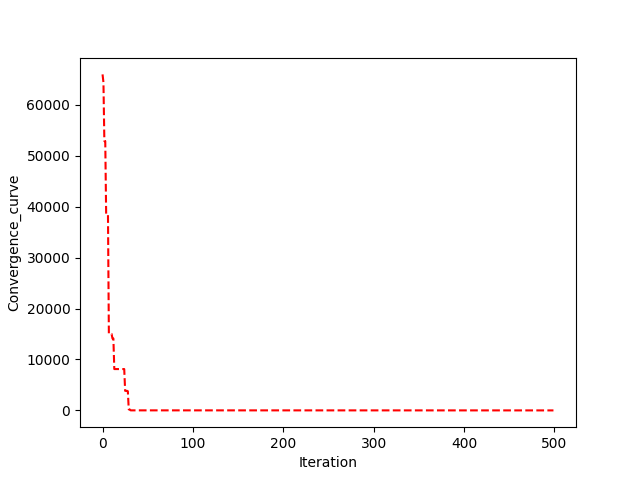

In [10]:
I = []
Iter = 1
while Iter < parameter.Max_Iter+1:
    
    A = 1-Iter*(1/parameter.Max_Iter)
    B = 2-Iter*(1/parameter.Max_Iter)
    for i in range(NCoot):
        if np.random.rand()<0.5:
            R = -1+2*np.random.rand() # number between 1 and -1
            R1 = np.random.rand()
        else:
            R = -1+2*np.random.rand(nvar)
            R1 = np.random.rand(nvar)
        
        k = np.mod(i,NLeader)
        if np.random.rand()<0.5:
            Coot[i].position = 2*R1*np.cos(2*np.pi*R)*(Leader[k].position-Coot[i].position)+Leader[k].position
            # Check boundries
            Coot[i].position = np.minimum(Coot[i].position , varmax)
            Coot[i].position = np.maximum(Coot[i].position , varmin)
        else:
            if np.random.rand()<0.5 and i!=0:
                Coot[i].position = (Coot[i].position+Coot[i-1].position)/2
            else:
                Q = np.random.uniform(varmin, varmax, nvar)
                Coot[i].position = Coot[i].position+A*R1*(Q-Coot[i].position)
                
            Coot[i].position = np.minimum(Coot[i].position , varmax)
            Coot[i].position = np.maximum(Coot[i].position , varmin) 
    
    # fitness of location of Coots
    for j in range(NCoot):
        Coot[j].cost = CostFunction(Coot[j].position)
        k = np.mod(i,NLeader)
        # Update the location of coot
        if Coot[j].cost < Leader[k].cost:
            Temp = Leader[k].position
            TempFit = Leader[k].cost
            Leader[k].cost = Coot[j].cost
            Leader[k].position = Coot[j].position
            Coot[j].cost = TempFit
            Coot[j].position= Temp
            
    # fitness of location of Leaders
    for x in range(NLeader):
        if np.random.rand()<0.5:
            R = -1+2*np.random.rand()
            R3 = np.random.rand()
        else:
            R = -1+2*np.random.rand(nvar)
            R3 = np.random.rand(nvar)
            
        if np.random.rand()<0.5:
            Temp = B*R3*np.cos(2*np.pi*R)*(gBest - Leader[x].position) + gBest
        else:
            Temp = B*R3*np.cos(2*np.pi*R)*(gBest - Leader[x].position) - gBest
            
        Temp = np.minimum(Temp , varmax)
        Temp = np.maximum(Temp , varmin)
        TempFit = CostFunction(Temp)
        
        # Update the location of Leader
        if gBestScore > TempFit:
            Leader[x].cost = gBestScore
            Leader[x].position = gBest
            gBestScore = TempFit
            gBest = Temp
            
    I.append(Iter-1)
    Convergence_curve[Iter-1] = gBestScore
    print(f"Iteration : {Iter-1} , Best Cost : {Convergence_curve[Iter-1]}")
    Iter+=1
t.stop()    
print('\n'+ f"Best Position : {gBest}\n")
plt.plot(I, Convergence_curve,'r--')
plt.xlabel('Iteration')
plt.ylabel('Convergence_curve')
plt.show()
        
            
            